# 紐約 Airbnb 數據挖掘

#### 自 2008 年以來，Airbnb 使遊客和房東出行更方便，提出更多個性化的體驗世界的方式
#### 該數據集包含有關 2019 年紐約出租的資訊，以及包含其地理資訊、價格、評論數量等

### 回答以下問題
* 1.哪些區域生意最好，為什麼？
* 2.哪些區域的流量比其他區域大，為什麼？
* 3.價格，評論數量和預訂天數之間是否存在一些關係？

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 顯示全部數據
pd.set_option('display.max_columns', None) 

# 讀取檔案
data=pd.read_csv('AB_NYC_2019.csv')

# 前五筆資料
print(data.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [2]:
# 查看有無缺失值
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [3]:
#補缺失值 數字 轉成0  字符 轉成 nn
data['reviews_per_month']=data['reviews_per_month'].fillna(0)

o=['name','host_name','last_review',]
data[o]=data[o].fillna('nn')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48895 non-null object
host_id                           48895 non-null int64
host_name                         48895 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       48895 non-null object
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [6]:
''' 
屬性說明:
    
id	
name 公寓名
host_id	
host_name 房東名
neighbourhood_group 哪個區
neighbourhood 區 裡的哪
latitude 緯度	
longitude 經度
room_type 	
price	
minimum_nights 最少入住天數	
number_of_reviews 評論數
last_review 最新評論日	
reviews_per_month 每月評論平均
calculated_host_listings_count 屋主有幾套房	
availability_365 可預訂天數
'''

' \n屬性說明:\n    \nid\t\nname 公寓名\nhost_id\t\nhost_name 房東名\nneighbourhood_group 哪個區\nneighbourhood 區 裡的哪\nlatitude 緯度\t\nlongitude 經度\nroom_type \t\nprice\t\nminimum_nights 最少入住天數\t\nnumber_of_reviews 評論數\nlast_review 最新評論日\t\nreviews_per_month 每月評論平均\ncalculated_host_listings_count 屋主有幾套房\t\navailability_365 可預訂天數\n'

## 1. 哪些區域生意最好，為什麼?

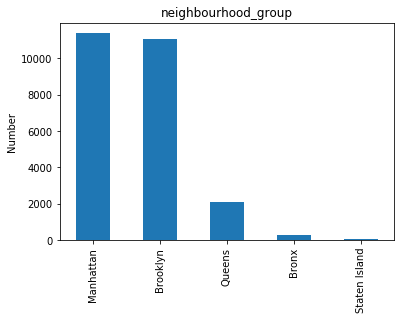

               neighbourhood_group
Manhattan                    11385
Brooklyn                     11070
Queens                        2091
Bronx                          308
Staten Island                   74


In [14]:
# 生意好 = 可預訂天數少 
# 從可預訂天數少的開始，再找出可能原因

# 篩選出可預訂日子少於50天的 = 生意好
day=50

day_50=data.query('availability_365 <= @day')

#顯示可能屬性
#1. neighbourhood_group 哪個區
fig = plt.figure()
fig.set(alpha=0.2) 

dis = day_50.neighbourhood_group.value_counts().sort_values(ascending=False)
dis.plot(kind='bar')
plt.title("neighbourhood_group")
plt.ylabel('Number')
plt.show()

df = pd.DataFrame({'neighbourhood_group': dis})
print(df)

In [49]:
#2. neighbourhood 區 裡的哪
# fig = plt.figure()
# fig.set(alpha=0.2) 

dis = day_50.neighbourhood.value_counts().sort_values(ascending=False)
# dis.plot(kind='bar')
# plt.title("neighbourhood")
# plt.ylabel('Number')
# #plt.show()  
# 資料太多，不顯示圖示

df = pd.DataFrame({'neighbourhood': dis})  
print(df.head())

                    neighbourhood
Williamsburg                 2542
Bedford-Stuyvesant           1794
Bushwick                     1413
Harlem                       1374
East Village                 1212


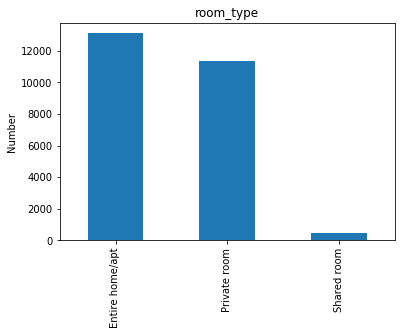

                 room_type
Entire home/apt      13111
Private room         11377
Shared room            440


In [16]:
#3. room_type
fig = plt.figure()
fig.set(alpha=0.2) 

dis = day_50.room_type.value_counts().sort_values(ascending=False)
dis.plot(kind='bar')
plt.title("room_type")
plt.ylabel('Number')
plt.show()

df = pd.DataFrame({'room_type': dis})  
print(df)

In [48]:
#4. price
# fig = plt.figure()
# fig.set(alpha=0.2) 

dis = day_50.price.value_counts().sort_values(ascending=False)
# dis.plot(kind='bar')
# plt.title("price")
# plt.ylabel('Number')
# plt.show()
# 資料太多，不顯示圖示

df = pd.DataFrame({'price': dis})  
print(df.head())

     price
150   1200
100   1195
50     912
200    820
60     791


In [47]:
#5. number_of_reviews
# fig = plt.figure()
# fig.set(alpha=0.2) 

dis = day_50.number_of_reviews.value_counts().sort_values(ascending=False)
# dis.plot(kind='bar')
# plt.title("number_of_reviews")
# plt.ylabel('Number')
# plt.show()
# 資料太多，不顯示圖示

df = pd.DataFrame({'number_of_reviews': dis})  
print(df.head())

   number_of_reviews
0               5880
1               3412
2               2250
3               1585
4               1184


In [46]:
#6. minimum_nights 最少入住天數
# fig = plt.figure()
# fig.set(alpha=0.2) 

dis = day_50.minimum_nights.value_counts().sort_values(ascending=False)
# dis.plot(kind='bar')
# plt.title("minimum_nights")
# plt.ylabel('Number')
# plt.show()
# 資料太多，不顯示圖示

df = pd.DataFrame({'minimum_nights': dis})  
print(df.head())

   minimum_nights
1            6468
2            6035
3            4363
4            2030
5            1931


### 以剩餘50天以下可預訂的區域
* Manhattan與Brooklyn 區域最好
* 區內的地理位置前五為 Williamsburg / Bedford-Stuyvesant / Bushwick / Harlem / East Village
* 房型集中在 Entire home/apt 與 Private room
* 價格在 150與100 最多 
* 評論數量幾乎沒有評論
* 最少入住天數為短天期 3天內最多

### 由以上結果可以了解到:
Manhattan 與 Brooklyn 是訂房最熱門的區域，區域內也有五大熱門地理位置受房客喜愛，住房的房型則為Entire home/apt 與 Private room 最受旅客青睞，定價價格在50至150最能讓大眾接受，房客偏向3天內的短天期住宿

## 2. 哪些區域的流量比其他區域大，為什麼？
#### 比較評論數大與評論數小的差異，找出其原因

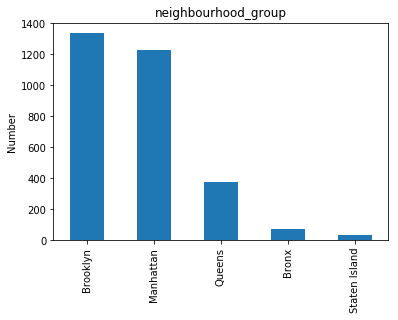

               neighbourhood_group
Brooklyn                      1337
Manhattan                     1230
Queens                         376
Bronx                           70
Staten Island                   31


In [21]:
# 流量大 = 評論數多
# 從評論數篩選找區域

# 評論數>100流量 (評論數)
reviews=100
reviews_100=data.query('number_of_reviews >= @reviews')

# 評論數<10流量 (評論數)
reviews2=10
reviews_10=data.query('number_of_reviews <= @reviews2')

#1. neighbourhood_group 哪個區
fig = plt.figure()
fig.set(alpha=0.2) 

dis = reviews_100.neighbourhood_group.value_counts().sort_values(ascending=False)
dis.plot(kind='bar')
plt.title("neighbourhood_group")
plt.ylabel('Number')
plt.show()

df = pd.DataFrame({'neighbourhood_group': dis})  
print(df)

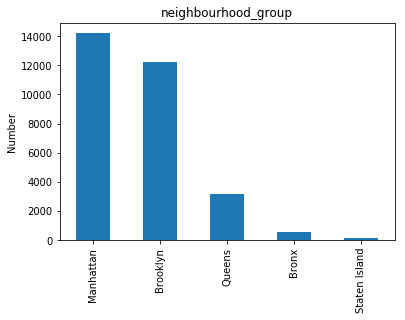

               neighbourhood_group
Manhattan                    14213
Brooklyn                     12206
Queens                        3145
Bronx                          584
Staten Island                  175


In [22]:
#1. neighbourhood_group 哪個區
fig = plt.figure()
fig.set(alpha=0.2) 

dis = reviews_10.neighbourhood_group.value_counts().sort_values(ascending=False)
dis.plot(kind='bar')
plt.title("neighbourhood_group")
plt.ylabel('Number')
plt.show()

df = pd.DataFrame({'neighbourhood_group': dis})  
print(df)

In [45]:
#2. neighbourhood 區 裡的哪
# fig = plt.figure()
# fig.set(alpha=0.2) 
dis = reviews_100.neighbourhood.value_counts().sort_values(ascending=False)
# dis.plot(kind='bar')
# plt.title("neighbourhood")
# plt.ylabel('Number')
# plt.show()
# 資料太多，不顯示圖示

df = pd.DataFrame({'neighbourhood': dis})  
print(df.head())

                    neighbourhood
Bedford-Stuyvesant            346
Williamsburg                  221
Harlem                        206
Hell's Kitchen                165
Bushwick                      134


In [44]:
#2. neighbourhood 區 裡的哪
# fig = plt.figure()
# fig.set(alpha=0.2) 
dis = reviews_10.neighbourhood.value_counts().sort_values(ascending=False)
# dis.plot(kind='bar')
# plt.title("neighbourhood")
# plt.ylabel('Number')
# plt.show()
# 資料太多，不顯示圖示

df = pd.DataFrame({'neighbourhood': dis})  
print(df.head())

                    neighbourhood
Williamsburg                 2542
Bedford-Stuyvesant           2038
Bushwick                     1601
Harlem                       1456
Upper West Side              1355


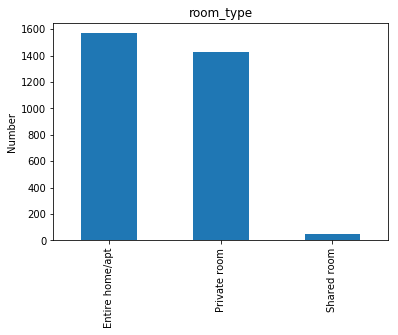

                 room_type
Entire home/apt       1569
Private room          1428
Shared room             47


In [28]:
#3. room_type
fig = plt.figure()
fig.set(alpha=0.2) 

dis = reviews_100.room_type.value_counts().sort_values(ascending=False)

dis.plot(kind='bar')
plt.title("room_type")
plt.ylabel('Number')
plt.show()

df = pd.DataFrame({'room_type': dis}) 
print(df)

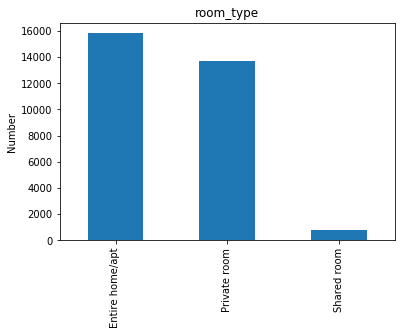

                 room_type
Entire home/apt      15822
Private room         13718
Shared room            783


In [29]:
#3. room_type
fig = plt.figure()
fig.set(alpha=0.2) 

dis = reviews_10.room_type.value_counts().sort_values(ascending=False)

dis.plot(kind='bar')
plt.title("room_type")
plt.ylabel('Number')
plt.show()

df = pd.DataFrame({'room_type': dis}) 
print(df)

In [34]:
# #4. price
# fig = plt.figure()
# fig.set(alpha=0.2) 
dis = reviews_100.price.value_counts().sort_values(ascending=False)
# dis.plot(kind='bar')
# plt.title("price")
# plt.ylabel('Number')
# plt.show()
# 資料太多，不顯示圖示

df = pd.DataFrame({'price': dis})  
print(df.head())

     price
100     99
150     84
99      82
75      81
125     81


In [33]:
# #4. price
# fig = plt.figure()
# fig.set(alpha=0.2) 
dis = reviews_10.price.value_counts().sort_values(ascending=False)
# dis.plot(kind='bar')
# plt.title("price")
# plt.ylabel('Number')
# plt.show()
# 資料太多，不顯示圖示

df = pd.DataFrame({'price': dis})  
print(df.head())

     price
150   1369
100   1369
50    1026
200    997
60     915


In [32]:
# #5. host_name
# fig = plt.figure()
# fig.set(alpha=0.2) 
dis = reviews_100.host_name.value_counts().sort_values(ascending=False)
# dis.plot(kind='bar')
# plt.title("host_name")
# plt.ylabel('Number')
# plt.show()
# 資料太多，不顯示圖示

df = pd.DataFrame({'host_name': dis}) 
print(df.head())

         host_name
Michael         33
Jason           27
John            18
Alex            18
Chris           17


In [35]:
# #5. host_name
# fig = plt.figure()
# fig.set(alpha=0.2) 
dis = reviews_10.host_name.value_counts().sort_values(ascending=False)
# dis.plot(kind='bar')
# plt.title("host_name")
# plt.ylabel('Number')
# plt.show()
# 資料太多，不顯示圖示

df = pd.DataFrame({'host_name': dis}) 
print(df.head())

              host_name
Sonder (NYC)        301
David               255
Michael             252
Blueground          232
John                176


In [40]:
#6. minimum_nights 最少入住天數
# fig = plt.figure()
# fig.set(alpha=0.2) 
dis = reviews_100.minimum_nights.value_counts().sort_values(ascending=False)
# dis.plot(kind='bar')
# plt.title("minimum_nights")
# plt.ylabel('Number')
# plt.show()
# 資料太多，不顯示圖示

df = pd.DataFrame({'minimum_nights': dis})  
print(df.head())

   minimum_nights
1            1126
2             979
3             570
4             167
5              85


In [41]:
#6. minimum_nights 最少入住天數
# fig = plt.figure()
# fig.set(alpha=0.2) 
dis = reviews_10.minimum_nights.value_counts().sort_values(ascending=False)
# dis.plot(kind='bar')
# plt.title("minimum_nights")
# plt.ylabel('Number')
# plt.show()
# 資料太多，不顯示圖示

df = pd.DataFrame({'minimum_nights': dis})  
print(df.head())

    minimum_nights
1             7564
2             5970
3             4567
30            3161
5             2069


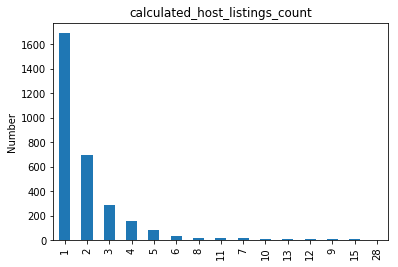

   calculated_host_listings_count
1                            1693
2                             693
3                             289
4                             157
5                              86


In [50]:
#7. calculated_host_listings_count 屋主有幾套房
fig = plt.figure()
fig.set(alpha=0.2) 
dis = reviews_100.calculated_host_listings_count.value_counts().sort_values(ascending=False)
dis.plot(kind='bar')
plt.title("calculated_host_listings_count")
plt.ylabel('Number')
plt.show()

df = pd.DataFrame({'calculated_host_listings_count': dis}) 
print(df.head())

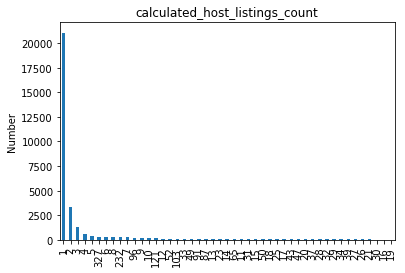

   calculated_host_listings_count
1                           21076
2                            3276
3                            1292
4                             609
5                             384


In [51]:
#7. calculated_host_listings_count 屋主有幾套房
fig = plt.figure()
fig.set(alpha=0.2) 
dis = reviews_10.calculated_host_listings_count.value_counts().sort_values(ascending=False)
dis.plot(kind='bar')
plt.title("calculated_host_listings_count")
plt.ylabel('Number')
plt.show()

df = pd.DataFrame({'calculated_host_listings_count': dis}) 
print(df.head())

### 評論數大於100與評論數小於100的比較，並無明顯差異
### 嘗試使用評論數大於100的區域最多與最少來做比較

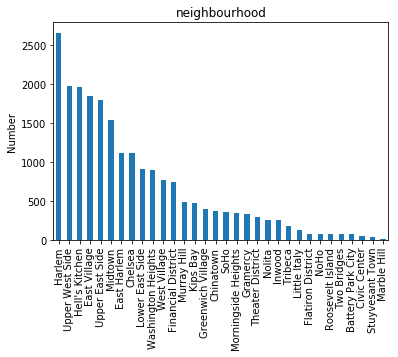

                 neighbourhood
Harlem                    2658
Upper West Side           1971
Hell's Kitchen            1958
East Village              1853
Upper East Side           1798


In [53]:
data_tg3=data.query("neighbourhood_group =='Manhattan'")

data_tg4=data.query("neighbourhood_group =='Staten Island'")

#2. neighbourhood 區 裡的哪
fig = plt.figure()
fig.set(alpha=0.2) 

dis = data_tg3.neighbourhood.value_counts().sort_values(ascending=False)

dis.plot(kind='bar')
plt.title("neighbourhood")
plt.ylabel('Number')
plt.show()

df = pd.DataFrame({'neighbourhood': dis})  
print(df.head())

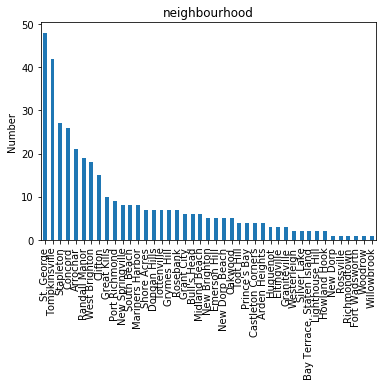

               neighbourhood
St. George                48
Tompkinsville             42
Stapleton                 27
Concord                   26
Arrochar                  21


In [54]:
#2. neighbourhood 區 裡的哪
fig = plt.figure()
fig.set(alpha=0.2) 

dis = data_tg4.neighbourhood.value_counts().sort_values(ascending=False)

dis.plot(kind='bar')
plt.title("neighbourhood")
plt.ylabel('Number')
plt.show()

df = pd.DataFrame({'neighbourhood': dis})  
print(df.head())

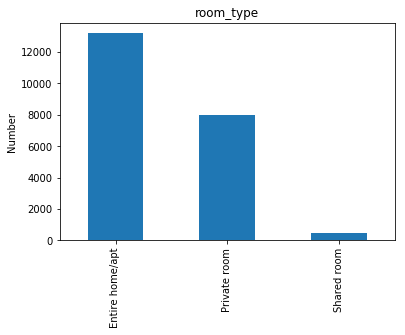

                 room_type
Entire home/apt      13199
Private room          7982
Shared room            480


In [55]:
#3. room_type
fig = plt.figure()
fig.set(alpha=0.2) 

dis = data_tg3.room_type.value_counts().sort_values(ascending=False)

dis.plot(kind='bar')
plt.title("room_type")
plt.ylabel('Number')
plt.show()

df = pd.DataFrame({'room_type': dis}) 
print(df)

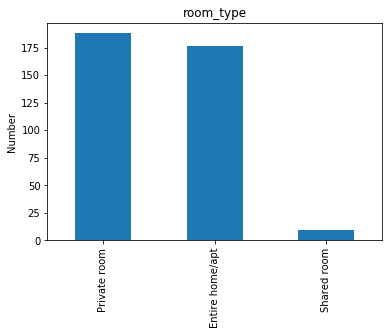

                 room_type
Private room           188
Entire home/apt        176
Shared room              9


In [56]:
#3. room_type
fig = plt.figure()
fig.set(alpha=0.2) 

dis = data_tg4.room_type.value_counts().sort_values(ascending=False)

dis.plot(kind='bar')
plt.title("room_type")
plt.ylabel('Number')
plt.show()

df = pd.DataFrame({'room_type': dis}) 
print(df)

In [57]:
# #4. price
# fig = plt.figure()
# fig.set(alpha=0.2) 
dis = data_tg3.price.value_counts().sort_values(ascending=False)
# dis.plot(kind='bar')
# plt.title("price")
# plt.ylabel('Number')
# plt.show()
# 資料太多，不顯示圖示

df = pd.DataFrame({'price': dis})  
print(df.head())

     price
150   1052
100    885
200    819
250    647
120    503


In [58]:
# #4. price
# fig = plt.figure()
# fig.set(alpha=0.2) 
dis = data_tg4.price.value_counts().sort_values(ascending=False)
# dis.plot(kind='bar')
# plt.title("price")
# plt.ylabel('Number')
# plt.show()
# 資料太多，不顯示圖示

df = pd.DataFrame({'price': dis})  
print(df.head())

     price
75      21
100     21
50      19
40      15
65      14


In [59]:
# #5. host_name
# fig = plt.figure()
# fig.set(alpha=0.2) 
dis = data_tg3.host_name.value_counts().sort_values(ascending=False)
# dis.plot(kind='bar')
# plt.title("host_name")
# plt.ylabel('Number')
# plt.show()
# 資料太多，不顯示圖示

df = pd.DataFrame({'host_name': dis})  
print(df.head())

              host_name
Sonder (NYC)        327
Blueground          230
Michael             212
David               202
John                151


In [60]:
# #5. host_name
# fig = plt.figure()
# fig.set(alpha=0.2) 
dis = data_tg4.host_name.value_counts().sort_values(ascending=False)
# dis.plot(kind='bar')
# plt.title("host_name")
# plt.ylabel('Number')
# plt.show()
# 資料太多，不顯示圖示

df = pd.DataFrame({'host_name': dis})  
print(df.head())

            host_name
Maria               9
Amarjit S           8
Marina              8
Nina                7
Simranjeet          7


In [63]:
# #6. minimum_nights 最少入住天數
# fig = plt.figure()
# fig.set(alpha=0.2) 
dis = data_tg3.minimum_nights.value_counts().sort_values(ascending=False)
# dis.plot(kind='bar')
# plt.title("minimum_nights")
# plt.ylabel('Number')
# plt.show()
# 資料太多，不顯示圖示

df = pd.DataFrame({'minimum_nights': dis})  
print(df.head())

    minimum_nights
1             5418
2             4506
3             3463
30            2399
4             1508


In [64]:
# #6. minimum_nights 最少入住天數
# fig = plt.figure()
# fig.set(alpha=0.2) 
dis = data_tg4.minimum_nights.value_counts().sort_values(ascending=False)
# dis.plot(kind='bar')
# plt.title("minimum_nights")
# plt.ylabel('Number')
# plt.show()
# 資料太多，不顯示圖示

df = pd.DataFrame({'minimum_nights': dis})  
print(df.head())

    minimum_nights
2              122
1              112
3               46
4               45
30              15


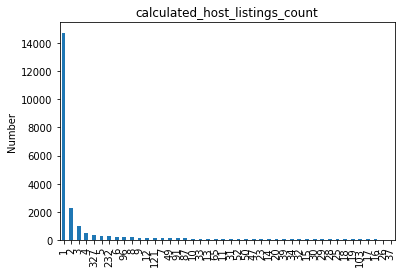

     calculated_host_listings_count
1                             14762
2                              2261
3                               993
4                               452
327                             327


In [65]:
#7. calculated_host_listings_count 屋主有幾套房
fig = plt.figure()
fig.set(alpha=0.2) 

dis = data_tg3.calculated_host_listings_count.value_counts().sort_values(ascending=False)

dis.plot(kind='bar')
plt.title("calculated_host_listings_count")
plt.ylabel('Number')
plt.show()

df = pd.DataFrame({'calculated_host_listings_count': dis})  
print(df.head())

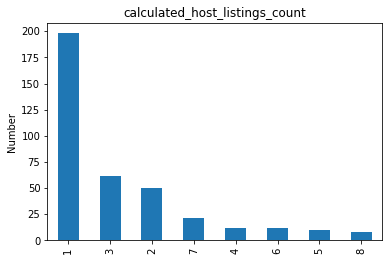

   calculated_host_listings_count
1                             198
3                              62
2                              50
7                              21
4                              12


In [66]:
#7. calculated_host_listings_count 屋主有幾套房
fig = plt.figure()
fig.set(alpha=0.2) 

dis = data_tg4.calculated_host_listings_count.value_counts().sort_values(ascending=False)

dis.plot(kind='bar')
plt.title("calculated_host_listings_count")
plt.ylabel('Number')
plt.show()

df = pd.DataFrame({'calculated_host_listings_count': dis})  
print(df.head())

### 討論數差異的可能原因:
* 區域的不同與地理位置的不同影響討論數
* 房東也是影響因素，主觀對房東的感受也會影響
* 至於房型、價格、最少入住日則無顯著關係

## 3.價格，評論數量和預訂天數之間是否存在一些關係？

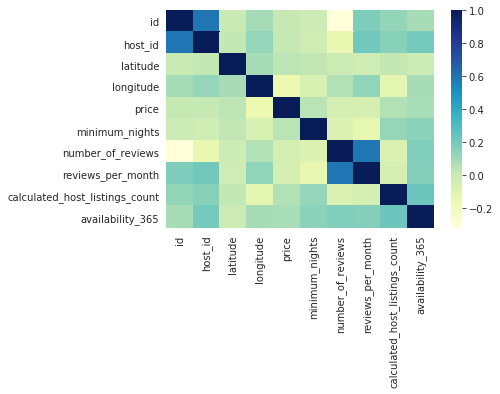

In [67]:
import seaborn as sns

# all屬性相關性
corr=data.corr()

# 畫關係圖 格線顏色
sns.set_style('whitegrid')

# 關係圖 顏色深 關係大
sns.heatmap(corr,cmap='YlGnBu')

plt.show()

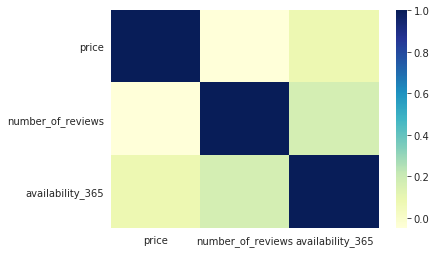

In [68]:
# 3屬性相關性: 價格，評論數量和預訂天數
th=['price','number_of_reviews','availability_365']
data3=data[th]

corr3=data3.corr()

sns.set_style('whitegrid')

sns.heatmap(corr3,cmap='YlGnBu')

plt.show()

### 由上圖顯示，價格，評論數量和預訂天數之間並沒有顯著相關